In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Visualize the latent space

## Imports

In [2]:
from collections import Counter

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import torch

from src.metrics.distribution_measures import Encoder
from src.data.dataset_updated import MakeDataLoader
from src.utils import get_device

## Configs|

In [3]:
path_encoder = '../models/cVAE/parameter_state_dict_Encoder.pth'
# dataset parameters
folder_images = '/home/kinakh/Datasets/galaxy-zoo/images_training_rev1/'
file_labels = '/home/kinakh/Datasets/galaxy-zoo/training_solutions_rev1.csv'
size = 64
augmented = False
batch_size = 64

device = get_device()

## Load encoder

In [4]:
encoder = Encoder()
ckpt = torch.load(path_encoder)
res = encoder.load_state_dict(ckpt)
print(f'Loading: {res}')

encoder.to(device)
encoder.eval();

Loading: <All keys matched successfully>


In [5]:
make_dl = MakeDataLoader(folder_images, file_labels, size, augmented=augmented)
dl_train = make_dl.get_data_loader_full(batch_size=batch_size)

In [6]:
len(dl_train) * batch_size

61568

## Compute latents

In [7]:
latents = []
labels = []


for images, lbl in tqdm(dl_train):
    images = images.to(device)
    labels.extend(lbl.detach().cpu().numpy())
    
    with torch.no_grad():
        mu, _ = encoder(images)
    latents.extend(mu.detach().cpu().numpy())
print(f'Number of latents: {len(latents)}')
latents = np.array(latents)
labels = np.array(labels)

100%|██████████| 962/962 [01:59<00:00,  8.02it/s]

Number of latents: 61568


## Apply clustering

In [ ]:
n_clusters=13
kmeans = KMeans(n_clusters, random_state=0)

kmeans.fit(labels)
preds = kmeans.predict(labels)

In [ ]:
labels_edge_on = labels[:, 3] > 0.9
preds_edge_on = preds[labels[:, 3] > 0.9]

len(preds_edge_on)

In [ ]:
preds_spiral_arms = preds[labels[:,7] > 0.9]
len(preds_spiral_arms)

In [ ]:
preds_barred = preds[np.logical_and(labels[:, 5] > 0.9, labels[:,7] < 0.9)]
len(preds_barred)

In [ ]:
preds_not_barred = preds[np.logical_and(labels[:, 6] > 0.9, labels[:,7] < 0.9)]
len(preds_not_barred)

In [ ]:
preds_completely_round = preds[labels[:,15] > 0.9]
len(preds_completely_round)

In [ ]:
preds_elliptic = preds[labels[:,16] > 0.9]
len(preds_elliptic)

In [ ]:
preds_elliptic

In [ ]:
count_edge_on = Counter(preds_edge_on)
vec_edge_on = [0] * n_clusters

for i in range(n_clusters):
    if i in count_edge_on:
        vec_edge_on[i] = count_edge_on[i]

vec_edge_on

In [ ]:
count_barred = Counter(preds_barred)
vec_barred = [0] * n_clusters

for i in range(n_clusters):
    if i in count_barred:
        vec_barred[i] = count_barred[i]
vec_barred

In [ ]:
count_not_barred = Counter(preds_not_barred)
vec_not_barred = [0] * n_clusters

for i in range(n_clusters):
    if i in count_not_barred:
        vec_not_barred[i] = count_not_barred[i]
vec_not_barred

In [ ]:
count_spiral_arms = Counter(preds_spiral_arms)
vec_spiral_arms = [0] * n_clusters

for i in range(n_clusters):
    if i in count_spiral_arms:
        vec_spiral_arms[i] = count_spiral_arms[i]
vec_spiral_arms

In [ ]:
count_completely_round = Counter(preds_completely_round)
vec_completely_round = [0] * n_clusters

for i in range(n_clusters):
    if i in count_completely_round:
        vec_completely_round[i] = count_completely_round[i]
vec_completely_round

In [ ]:
count_elliptic = Counter(preds_elliptic)
vec_elliptic = [0] * n_clusters

for i in range(n_clusters):
    if i in count_elliptic:
        vec_elliptic[i] = count_elliptic[i]
vec_elliptic

In [ ]:
x = [f'C{i+1}' for i in range(13)]

In [ ]:
vec_edge_on = np.array(vec_edge_on)
vec_barred = np.array(vec_barred)
vec_not_barred = np.array(vec_not_barred)
vec_spiral_arms = np.array(vec_spiral_arms)
vec_completely_round = np.array(vec_completely_round)
vec_elliptic = np.array(vec_elliptic)

In [ ]:
vec_sum = vec_edge_on + vec_barred + vec_not_barred + vec_spiral_arms + vec_completely_round + vec_elliptic

In [ ]:
vec_sum[vec_sum == 0] = 1

In [ ]:
vec_edge_on = vec_edge_on / vec_sum
vec_barred = vec_barred / vec_sum
vec_not_barred = vec_not_barred / vec_sum
vec_spiral_arms = vec_spiral_arms / vec_sum
vec_completely_round = vec_completely_round / vec_sum
vec_elliptic = vec_elliptic / vec_sum

In [ ]:
vec_edge_on

In [ ]:
vec_not_barred

In [ ]:
import matplotlib.ticker as mtick

In [ ]:
plt.figure()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.bar(x, vec_edge_on, color='cyan', label='Edge on')
plt.bar(x, vec_barred, bottom=vec_edge_on, color='green', label='Barred')
plt.bar(x, vec_not_barred, bottom=vec_edge_on+vec_barred, color='red', label='Not barred')
plt.bar(x, vec_spiral_arms, bottom=vec_edge_on+vec_barred+vec_not_barred, color='yellow', label='Spiral arms')
plt.bar(x, vec_completely_round, bottom=vec_edge_on+vec_barred+vec_not_barred+vec_spiral_arms, color='blue', 
        label='Completely round')
plt.bar(x, vec_elliptic, bottom=vec_edge_on+vec_barred+vec_not_barred+vec_spiral_arms+vec_completely_round,
       color='orange', label='Elliptic')
plt.xlabel('Cluster')
plt.ylabel('Galaxies')
plt.legend()

plt.savefig('bar_chart_updated.png', dpi=600)

<IPython.core.display.Javascript object>


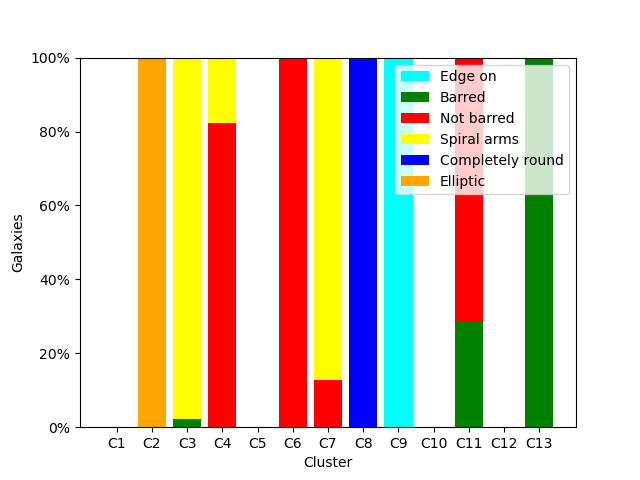

In [53]:
plt.figure()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.bar(x, vec_edge_on, color='cyan', label='Edge on')
plt.bar(x, vec_barred, bottom=vec_edge_on, color='green', label='Barred')
plt.bar(x, vec_not_barred, bottom=vec_edge_on+vec_barred, color='red', label='Not barred')
plt.bar(x, vec_spiral_arms, bottom=vec_edge_on+vec_barred+vec_not_barred, color='yellow', label='Spiral arms')
plt.bar(x, vec_completely_round, bottom=vec_edge_on+vec_barred+vec_not_barred+vec_spiral_arms, color='blue', 
        label='Completely round')
plt.bar(x, vec_elliptic, bottom=vec_edge_on+vec_barred+vec_not_barred+vec_spiral_arms+vec_completely_round,
       color='orange', label='Elliptic')
plt.xlabel('Cluster')
plt.ylabel('Galaxies')
plt.legend()

plt.savefig('bar_chart_updated.png', dpi=600)